# AIMS

Data Generators para no saturar la memoria

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import string
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

2023-07-31 15:18:27.077232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 15:18:27.274614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 15:18:27.285694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 15:18:30.353165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'cc'
project = 'Curso Profesional de Redes Neuronales con TensorFlow'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data('processed')

In [4]:
# !wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
#     -O sign-language-img.zip

In [5]:
# # Descomprimimos   -> usar esto demora mucho
# local_zip = 'sign-language-img.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall(raw / 'sign-language-img')
# zip_ref.close()

## Cargar el train y test

In [6]:
train_dir = raw / "sign-language-img/Train"
test_dir = raw / "sign-language-img/Test"

## Data Generators

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


## Definir las clases 

Recordar que hay dos letras que no tenemos J y Z

In [9]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## Visualizacion

In [10]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

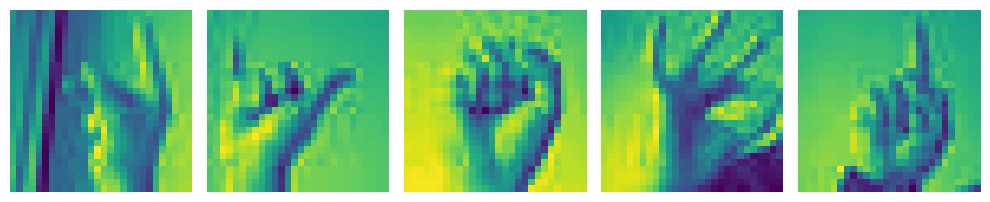

In [11]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [12]:
print('Ok_')

Ok_
